In [63]:
# Importing Data manipulation libraries
import pandas as pd
import numpy as np
# Importing v. isualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing filter warning library
import warnings
warnings.filterwarnings('ignore')

# importing logging library
import logging
# Setting up logging. 
logging.basicConfig(level=logging.INFO, format='[%(asctime)s]: %(message)s:',
                    filemode= 'w',
                    filename= 'model.log',
                    )

In [64]:
# Loading the dataset from the given URL. 
df = pd.read_csv('https://raw.githubusercontent.com/anirudhajohare19/EnE_TitanicModelBuilding/refs/heads/main/titanic_train.csv')

df.sample(frac=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C


In [65]:
# Checking the structure of dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
# checking missing values in the dataset. 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
# droping columns 'PassengerId', 'Cabin', 'Name', 'Ticket' as they are not relevant for the analysis. 
df.drop(columns= ['PassengerId','Cabin','Name', 'Ticket'], axis=1, inplace=True)


In [68]:
Q = df[df['Embarked'] == 'Q']
Q.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         49
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [69]:
C = df[df['Embarked'] == 'C']
C.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         38
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [70]:
S = df[df['Embarked'] == 'S']
S.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         90
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

<Axes: >

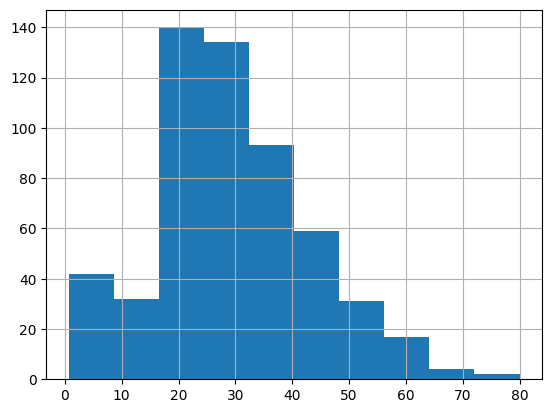

In [71]:
S.Age.hist()

In [72]:
S.Age.median()

28.0

<Axes: >

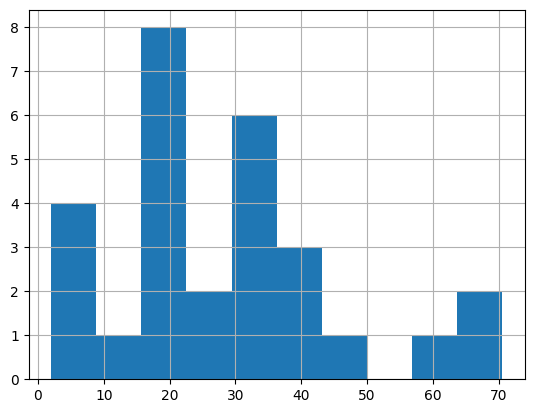

In [73]:
Q.Age.hist()

<Axes: >

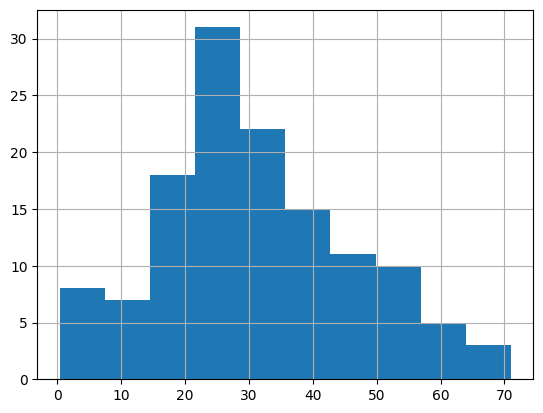

In [74]:
C.Age.hist()

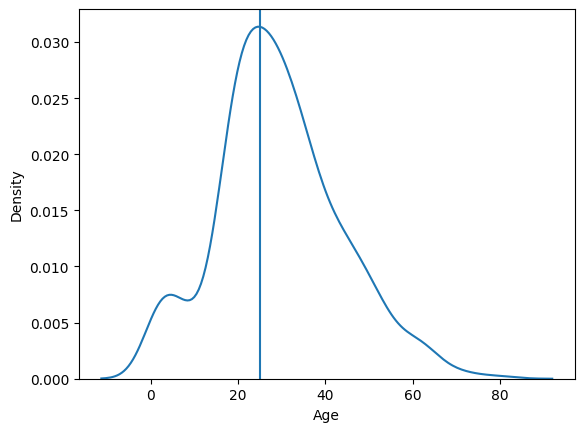

In [75]:
sns.kdeplot(S, x = "Age")
plt.axvline(25)

sns.kdeplot(df, x = "Age")
plt.axvline(26)

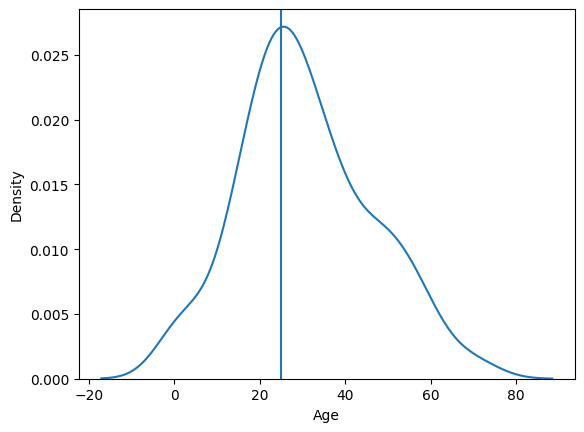

In [76]:
sns.kdeplot(C, x = "Age")
plt.axvline(25)

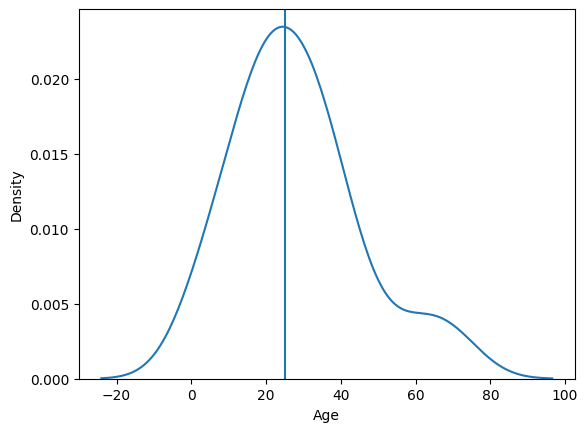

In [77]:
sns.kdeplot(Q, x = "Age")
plt.axvline(25)

Filling Missing values In Age column with 25 after checking the distribution of age for each embarkment point with kde Plot and Histogram. 

In [78]:
df.Age.fillna(25, inplace=True)

In [79]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [80]:
df.Embarked.fillna('S', inplace=True)

 Filling Missing Values In Embarked column with 'S'because S is the Maximum accurancy with compares to Pclass and fare. 

In [81]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [82]:
# label encoding categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [83]:
# df['Family'] = df['SibSp'] + df['Parch']

In [84]:
# df.corr().Survived

In [85]:
df.drop(columns={'Parch','SibSp','Embarked'})

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,25.0,23.4500
889,1,1,1,26.0,30.0000


In [86]:
# Splitting the dataset into X and y
X = df.drop(columns=['Survived'])
y = df['Survived']

In [87]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [88]:
# Scaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [90]:
# Step 4: Using SMOTE Technique to Balance Target Column.
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [91]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.055927,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.352638,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.075406,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.055927,-0.352638,0.075406,1.000000,-0.232948,-0.159632,0.105009,-0.004662
SibSp,-0.035322,0.083081,-0.114631,-0.232948,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.159632,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.105009,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.004662,0.068230,0.039798,-0.224719,1.000000


In [92]:
# Model Building
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_Score_RF = accuracy_score(y_test, y_pred_RF)
accuracy_Score_RF


0.7649253731343284

In [93]:
# Using GridSearchCV for Improving Model Accuracy
from sklearn.model_selection import GridSearchCV

# GridSearchCV(estimator = RandomForestClassifier()
         #   param_grid = {'n_estimators' : [100,150,200,300,400,500,600,700]})

In [94]:
# Logistics Regression classifier

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_LR

0.7985074626865671

In [95]:
# Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_DT

0.7388059701492538

In [96]:
# Support Vector Machine classifier

from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
accuracy_SVM

0.7985074626865671

In [97]:
# KNN classifier

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_KNN

0.7873134328358209

In [98]:
# GridSearchCV on KNN
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,25.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [99]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [100]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[122  35]
 [ 26  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       157
           1       0.71      0.77      0.74       111

    accuracy                           0.77       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.77      0.77       268



In [ ]:
# gridSearchcv on knn

